Regrid each files -> average -> plot

In [1]:
import xesmf as xe
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob as glob
import os
import pandas as pd
from pvlib.solarposition import get_solarposition

In [2]:
# Load the dataset
files = sorted(glob.glob(
    "/home/alubianashari/no2_trop_raqms/tracer.202308*.nc"
))
print(files)


['/home/alubianashari/no2_trop_raqms/tracer.2023080100.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080106.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080112.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080118.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080200.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080206.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080212.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080218.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080300.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080306.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080312.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080318.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080400.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080406.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080412.5deg.ll

In [3]:
raqms_ds = xr.open_dataset(files[0])
print(raqms_ds)
print(raqms_ds.dims)
print(raqms_ds.coords)


<xarray.Dataset> Size: 4MB
Dimensions:          (time: 1, lat: 361, lon: 720, grid_yt: 361, grid_xt: 720)
Coordinates:
  * grid_yt          (grid_yt) float64 3kB -90.0 -89.5 -89.0 ... 89.0 89.5 90.0
  * grid_xt          (grid_xt) float64 6kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * time             (time) datetime64[ns] 8B 2023-08-01
    lat              (lat, lon) float32 1MB ...
    lon              (lat, lon) float32 1MB ...
Data variables:
    no2_trop_column  (time, lat, lon) float64 2MB ...
FrozenMappingWarningOnValuesAccess({'time': 1, 'lat': 361, 'lon': 720, 'grid_yt': 361, 'grid_xt': 720})
Coordinates:
  * grid_yt  (grid_yt) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * grid_xt  (grid_xt) float64 6kB 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * time     (time) datetime64[ns] 8B 2023-08-01
    lat      (lat, lon) float32 1MB ...
    lon      (lat, lon) float32 1MB ...


In [28]:
timestamp_str = os.path.basename(files[7]).split('.')[1]
timestamp = pd.to_datetime(timestamp_str, format='%Y%m%d%H')
print(timestamp)

2023-08-02 18:00:00


In [29]:
raqms_lat = raqms_ds['grid_yt'].values
raqms_lon = raqms_ds['grid_xt'].values
#Create 2D grid for lat/lon ---
lon2d, lat2d = np.meshgrid(raqms_lon, raqms_lat)  # shape (361, 720)

In [30]:
#one lat/lon per point
flat_lat = lat2d.flatten()
flat_lon = lon2d.flatten()
flat_time = np.full_like(flat_lat, fill_value=timestamp, dtype='datetime64[ns]')

In [31]:
solpos = get_solarposition(flat_time, flat_lat, flat_lon)
print(solpos)

                     apparent_zenith      zenith  apparent_elevation  \
2023-08-02 18:00:00       107.689174  107.689174          -17.689174   
2023-08-02 18:00:00       107.689174  107.689174          -17.689174   
2023-08-02 18:00:00       107.689174  107.689174          -17.689174   
2023-08-02 18:00:00       107.689174  107.689174          -17.689174   
2023-08-02 18:00:00       107.689174  107.689174          -17.689174   
...                              ...         ...                 ...   
2023-08-02 18:00:00        72.263696   72.315397           17.736304   
2023-08-02 18:00:00        72.263696   72.315397           17.736304   
2023-08-02 18:00:00        72.263696   72.315397           17.736304   
2023-08-02 18:00:00        72.263696   72.315397           17.736304   
2023-08-02 18:00:00        72.263696   72.315397           17.736304   

                     elevation     azimuth  equation_of_time  
2023-08-02 18:00:00 -17.689174  271.573957         -6.292522  
2023-08-0

In [32]:
sza_flat = solpos['apparent_zenith'].values
sza = sza_flat.reshape(lat2d.shape)
sza

array([[107.68917419, 107.68917419, 107.68917419, ..., 107.68917419,
        107.68917419, 107.68917419],
       [107.67474578, 107.67910752, 107.68347007, ..., 107.66166881,
        107.6660261 , 107.6703852 ],
       [107.65892848, 107.66765096, 107.67637529, ..., 107.63277878,
        107.64149173, 107.65020852],
       ...,
       [ 72.23908428,  72.24778319,  72.25648308, ...,  72.21300003,
         72.22169203,  72.23038701],
       [ 72.25069626,  72.25504564,  72.25939562, ...,  72.23765503,
         72.24200062,  72.24634781],
       [ 72.2636957 ,  72.2636957 ,  72.2636957 , ...,  72.2636957 ,
         72.2636957 ,  72.2636957 ]])

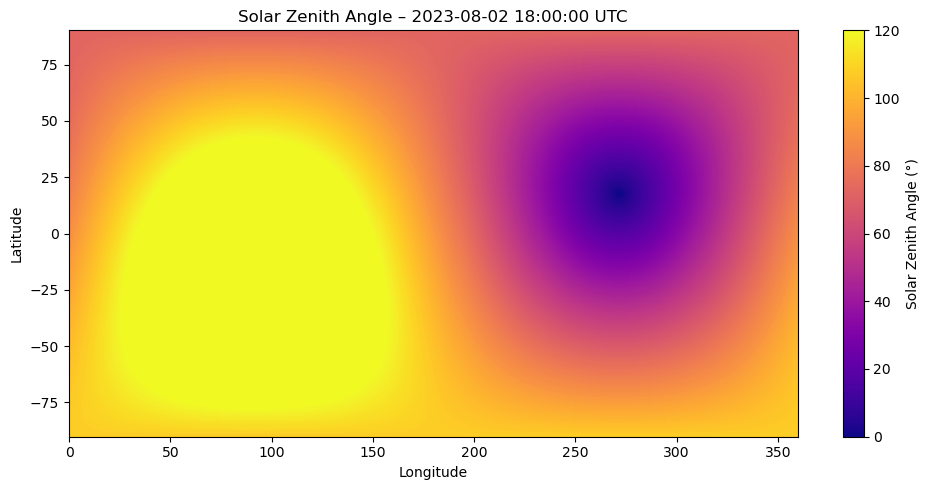

In [33]:
plt.figure(figsize=(10, 5))
plt.pcolormesh(lon2d, lat2d, sza, shading='auto', cmap='plasma', vmin=0, vmax=120)
plt.colorbar(label='Solar Zenith Angle (°)')
plt.title(f'Solar Zenith Angle – {timestamp} UTC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

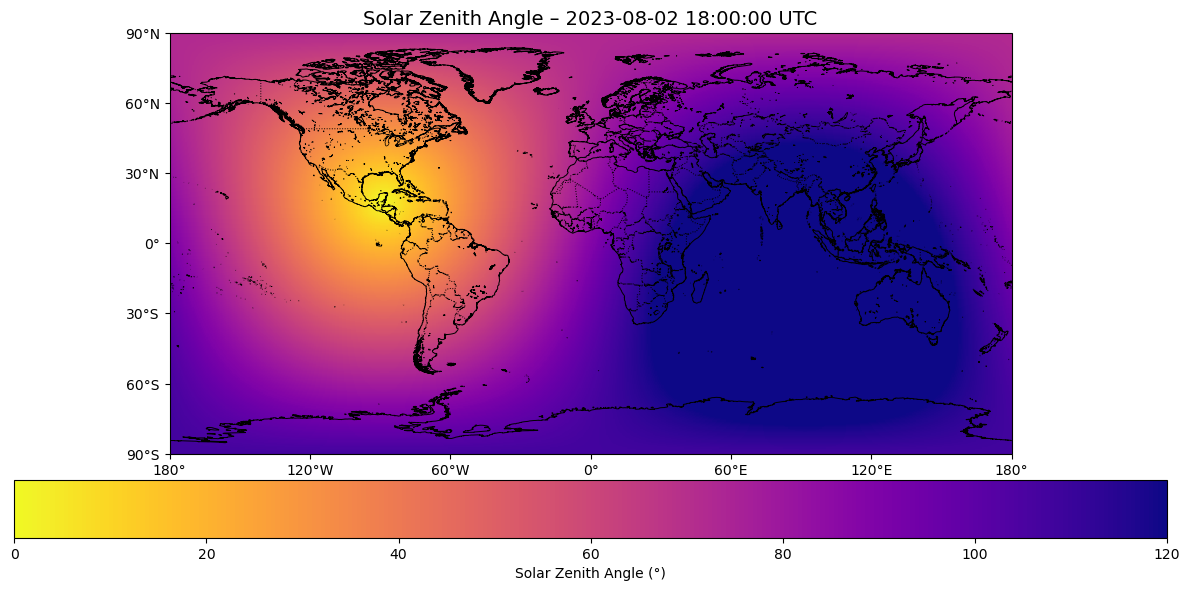

In [44]:
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import numpy as np

# Background: global features
def plot_background(ax):
    ax.add_feature(cf.LAND.with_scale('10m'), facecolor='lightgray')
    ax.add_feature(cf.OCEAN.with_scale('10m'), facecolor='white')
    ax.add_feature(cf.COASTLINE.with_scale('10m'), linewidth=0.7)
    ax.add_feature(cf.BORDERS.with_scale('10m'), linestyle=':', linewidth=0.7)
    ax.add_feature(cf.LAKES.with_scale('10m'), facecolor='none', edgecolor='black', linewidth=0.5)
    return ax

# Latitude/longitude ticks and formatting
def plot_ticks(ax):
    ax.set_global()
    ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(number_format='.0f', degree_symbol='°'))
    ax.yaxis.set_major_formatter(LatitudeFormatter(number_format='.0f', degree_symbol='°'))
    return ax

# --- Plotting ---
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add features and ticks
plot_background(ax)
plot_ticks(ax)

no2 = raqms_ds['no2_trop_column'].isel(time=0) /10  # Convert from 1e15 to 1e16 molecules/cm²
no2_masked = np.where(sza >= 70, np.nan, no2)

# Plot the SZA data
mesh = ax.pcolormesh(lon2d, lat2d, sza, cmap='plasma_r', shading='auto',
                     vmin=0, vmax=120, transform=ccrs.PlateCarree())

# Colorbar
cbar = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cbar.set_label('Solar Zenith Angle (°)')

# Title
ax.set_title(f'Solar Zenith Angle – {timestamp} UTC', fontsize=14)

plt.tight_layout()
plt.show()


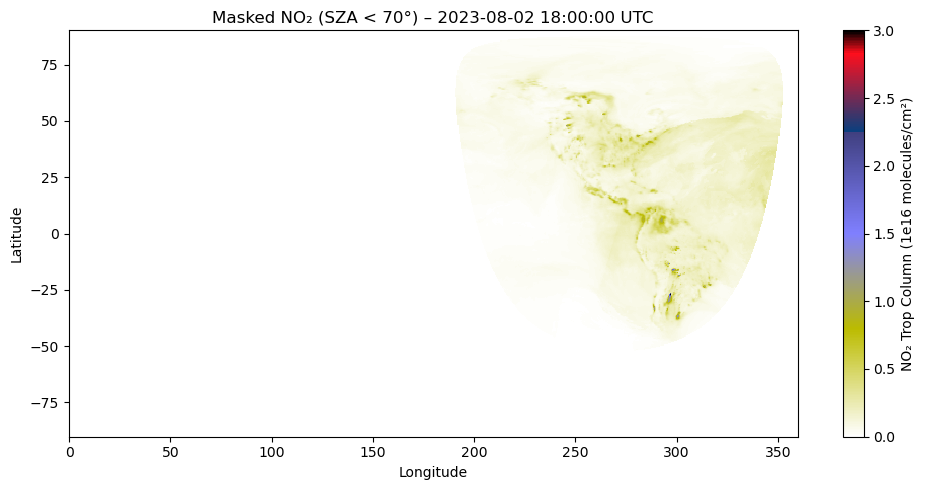

In [35]:
#mask where SZA is >= 70 degrees (keep no2 data where SZA < 70)

no2 = raqms_ds['no2_trop_column'].isel(time=0) /10  # Convert from 1e15 to 1e16 molecules/cm²
no2_masked = np.where(sza >= 70, np.nan, no2)

plt.figure(figsize=(10, 5))
plt.pcolormesh(lon2d, lat2d, no2_masked, shading='auto', cmap='gist_stern_r', vmin=0, vmax=3)
plt.colorbar(label='NO₂ Trop Column (1e16 molecules/cm²)')
plt.title(f'Masked NO₂ (SZA < 70°) – {timestamp} UTC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()



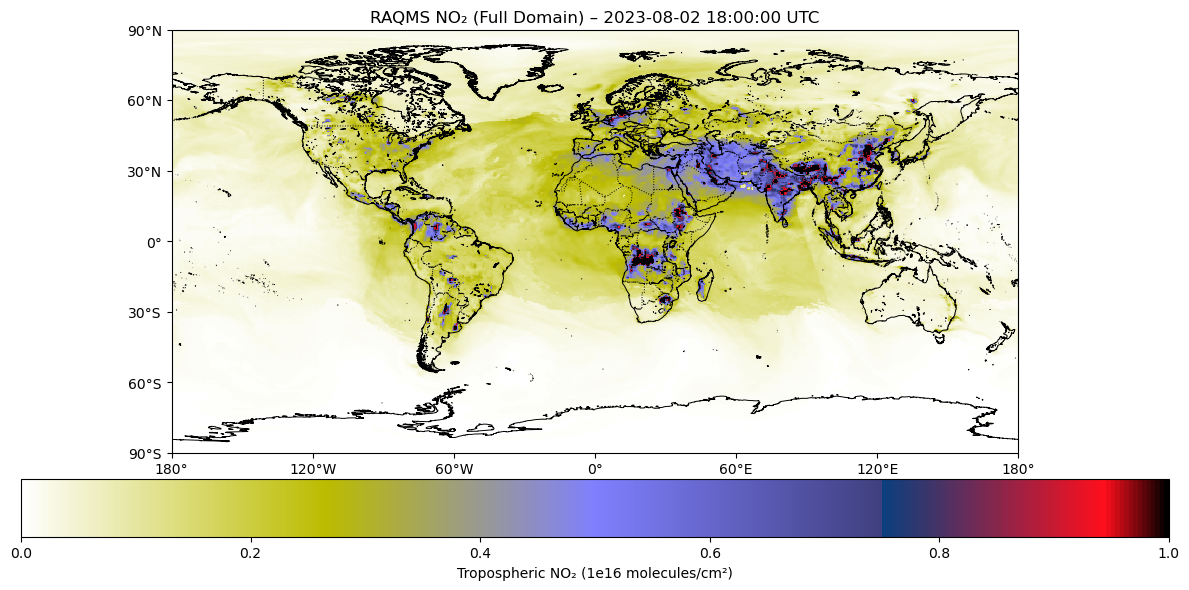

In [48]:
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import numpy as np

# --- Mask NO₂ where SZA ≥ 70
no2 = raqms_ds['no2_trop_column'].isel(time=0) / 10  # Convert 1e15 → 1e16
no2_masked = np.where(sza >= 70, np.nan, no2)

# --- Plot
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Background map
ax.add_feature(cf.LAND.with_scale('10m'), facecolor='lightgray')
ax.add_feature(cf.OCEAN.with_scale('10m'), facecolor='white')
ax.add_feature(cf.COASTLINE.with_scale('10m'), linewidth=0.7)
ax.add_feature(cf.BORDERS.with_scale('10m'), linestyle=':', linewidth=0.7)
ax.add_feature(cf.LAKES.with_scale('10m'), facecolor='none', edgecolor='black', linewidth=0.5)

# Ticks
ax.set_global()
ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter(number_format='.0f', degree_symbol='°'))
ax.yaxis.set_major_formatter(LatitudeFormatter(number_format='.0f', degree_symbol='°'))

# Plot masked NO₂
mesh = ax.pcolormesh(lon2d, lat2d, no2, shading='auto',
                     cmap='gist_stern_r', vmin=0, vmax=1,
                     transform=ccrs.PlateCarree())

# Colorbar
cbar = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cbar.set_label('Tropospheric NO₂ (1e16 molecules/cm²)')

# Title
ax.set_title(f'RAQMS NO₂ (Full Domain) – {timestamp} UTC')

plt.tight_layout()
plt.show()


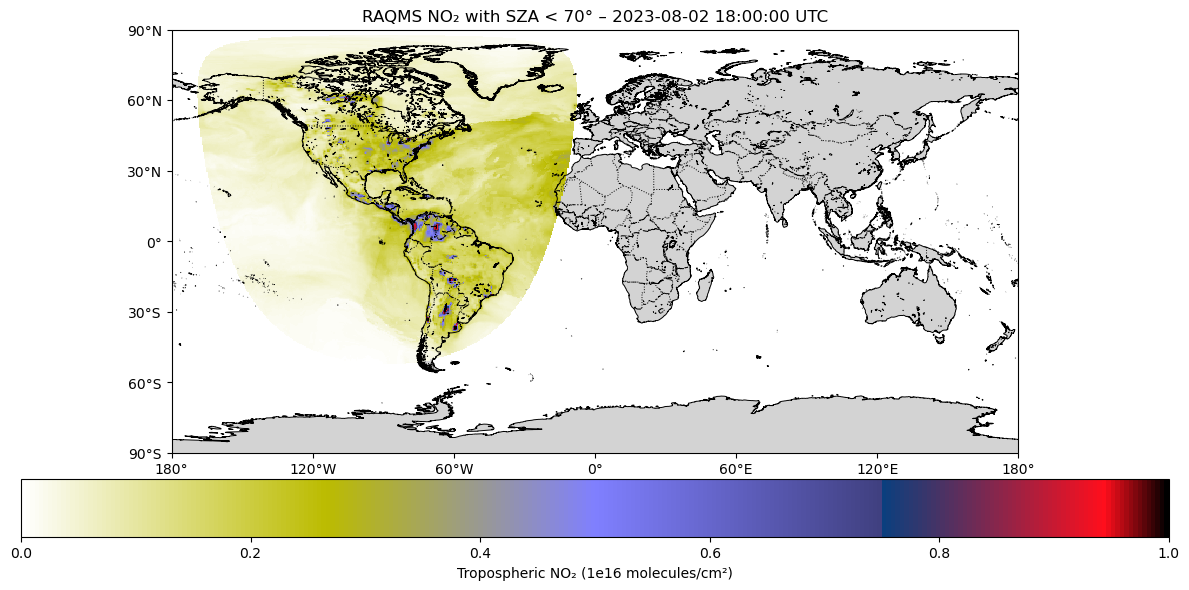

In [47]:
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import numpy as np

# --- Mask NO₂ where SZA ≥ 70
no2 = raqms_ds['no2_trop_column'].isel(time=0) / 10  # Convert 1e15 → 1e16
no2_masked = np.where(sza >= 70, np.nan, no2)

# --- Plot
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Background map
ax.add_feature(cf.LAND.with_scale('10m'), facecolor='lightgray')
ax.add_feature(cf.OCEAN.with_scale('10m'), facecolor='white')
ax.add_feature(cf.COASTLINE.with_scale('10m'), linewidth=0.7)
ax.add_feature(cf.BORDERS.with_scale('10m'), linestyle=':', linewidth=0.7)
ax.add_feature(cf.LAKES.with_scale('10m'), facecolor='none', edgecolor='black', linewidth=0.5)

# Ticks
ax.set_global()
ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter(number_format='.0f', degree_symbol='°'))
ax.yaxis.set_major_formatter(LatitudeFormatter(number_format='.0f', degree_symbol='°'))

# Plot masked NO₂
mesh = ax.pcolormesh(lon2d, lat2d, no2_masked, shading='auto',
                     cmap='gist_stern_r', vmin=0, vmax=1,
                     transform=ccrs.PlateCarree())

# Colorbar
cbar = plt.colorbar(mesh, orientation='horizontal', pad=0.05)
cbar.set_label('Tropospheric NO₂ (1e16 molecules/cm²)')

# Title
ax.set_title(f'RAQMS NO₂ with SZA < 70° – {timestamp} UTC')

plt.tight_layout()
plt.show()


In [55]:
raqms_lat.shape, raqms_lon.shape

((361,), (720,))

In [18]:
tempo_file = '/ships22/raqms/Satellite/TEMPO/V03/L3/NO2/2023/TEMPO_NO2_L3_V03_20230802T151249Z_S001.nc'
tempo_ds = xr.open_dataset(tempo_file)

tempo_lat = tempo_ds['latitude']
tempo_lon = tempo_ds['longitude']
tempo_ds

<xarray.Dataset> Size: 91MB
Dimensions:    (longitude: 7750, latitude: 2950, time: 1)
Coordinates:
  * longitude  (longitude) float32 31kB -168.0 -168.0 -167.9 ... -13.03 -13.01
  * latitude   (latitude) float32 12kB 14.01 14.03 14.05 ... 72.95 72.97 72.99
  * time       (time) datetime64[ns] 8B 2023-08-02T15:13:07.138977024
Data variables:
    weight     (latitude, longitude) float32 91MB ...
Attributes: (12/40)
    history:                          2024-06-03T16:39:32Z: L2_regrid -v /tem...
    scan_num:                         1
    time_coverage_start:              2023-08-02T15:12:49Z
    time_coverage_end:                2023-08-02T16:14:59Z
    time_coverage_start_since_epoch:  1375024387.138977
    time_coverage_end_since_epoch:    1375028117.3767278
    ...                               ...
    title:                            TEMPO Level 3 nitrogen dioxide product
    collection_shortname:             TEMPO_NO2_L3
    collection_version:               1
    keywords:                         EARTH SCIENCE>ATMOSPHERE>AIR QUALITY>NI...
    summary:                          Nitrogen dioxide Level 3 files provide ...
    coremetadata:                     \nGROUP                  = INVENTORYMET...

In [19]:
source_grid = {'lat': raqms_lat, 'lon': raqms_lon}
target_grid = {'lat': tempo_lat, 'lon': tempo_lon}

In [20]:
regridder = xe.Regridder(source_grid, target_grid, method='bilinear', periodic=True)


In [22]:
#for all files

output_dir = "no2_trop_RAQMS_Regridded_TEMPO_nc"
os.makedirs(output_dir, exist_ok=True)

for file_path in files:
    ds = xr.open_dataset(file_path)
    timestamp_str = os.path.basename(file_path).split('.')[1]
    timestamp = pd.to_datetime(timestamp_str, format='%Y%m%d%H')

# Extract lat/lon and build 2D grid
    raqms_lat = ds['grid_yt'].values
    raqms_lon = ds['grid_xt'].values
    lon2d, lat2d = np.meshgrid(raqms_lon, raqms_lat)

# Flatten for SZA calculation
    flat_lat = lat2d.flatten()
    flat_lon = lon2d.flatten()
    flat_time = np.full_like(flat_lat, fill_value=timestamp, dtype='datetime64[ns]')
# SZA calculation  
    solpos = get_solarposition(flat_time, flat_lat, flat_lon)
    sza_flat = solpos['apparent_zenith'].values
    sza = sza_flat.reshape(lat2d.shape)

# Mask NO₂
    no2 = ds['no2_trop_column'].isel(time=0).values / 10 # Convert from 1e15 to 1e16 molecules/cm
    no2_masked = np.where(sza >= 70, np.nan, no2)

    # Wrap as DataArray
    no2_da = xr.DataArray(
        no2_masked,
        dims=['lat', 'lon'],
        coords={'lat': raqms_lat, 'lon': raqms_lon}
    )

# Regrid
    no2_regridded = regridder(no2_da)

# Save regridded nc files
    base = os.path.basename(file_path)
    out_path = os.path.join(output_dir, base)
    out_ds = xr.Dataset({'no2_trop_column': no2_regridded})
    out_ds.to_netcdf(out_path)
    print(f"Saved regridded file: {out_path}")



/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080100.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080106.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080112.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080118.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080200.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080206.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080212.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080218.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080300.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080306.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080312.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080318.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080400.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080406.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080412.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080418.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080500.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080506.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080512.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080518.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080600.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080606.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080612.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080618.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080700.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080706.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080712.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080718.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080800.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080806.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080812.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080818.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080900.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080906.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080912.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080918.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081000.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081006.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081012.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081018.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081100.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081106.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081112.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081118.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081200.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081206.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081212.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081218.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081300.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081306.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081312.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081318.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081400.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081406.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081412.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081418.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081500.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081506.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081512.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081518.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081600.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081606.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081612.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081618.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081700.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081706.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081712.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081718.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081800.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081806.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081812.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081818.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081900.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081906.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081912.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023081918.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082000.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082006.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082012.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082018.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082100.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082106.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082112.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082118.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082200.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082206.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082212.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082218.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082300.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082306.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082312.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082318.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082400.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082406.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082412.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082418.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082500.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082506.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082512.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082518.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082600.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082606.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082612.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082618.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082700.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082706.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082712.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082718.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082800.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082806.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082812.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082818.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082900.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082906.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082912.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023082918.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023083000.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023083006.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023083012.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023083018.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023083100.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023083106.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023083112.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023083118.5deg.ll.nc


In [2]:
n_files = sorted(glob.glob("/home/alubianashari/no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.202308*.nc"))
print(n_files)

['/home/alubianashari/no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080100.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080106.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080112.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080118.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080200.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080206.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080212.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080218.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080300.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080306.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080312.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_TEMPO_n

In [3]:
ds = xr.open_dataset(n_files[0])
ds

<xarray.Dataset> Size: 183MB
Dimensions:          (latitude: 2950, longitude: 7750)
Coordinates:
  * latitude         (latitude) float32 12kB 14.01 14.03 14.05 ... 72.97 72.99
  * longitude        (longitude) float32 31kB -168.0 -168.0 ... -13.03 -13.01
Data variables:
    no2_trop_column  (latitude, longitude) float64 183MB ...

In [4]:
#grouping files by day
daily_files = {}
for f in n_files:
    filename = os.path.basename(f)
    timestamp = filename.split('.')[1]
    date_str = timestamp[:8]

    if date_str not in daily_files:
        daily_files[date_str] = [f]
    else:
        daily_files[date_str].append(f)
print(daily_files.keys())

dict_keys(['20230801', '20230802', '20230803', '20230804', '20230805', '20230806', '20230807', '20230808', '20230809', '20230810', '20230811', '20230812', '20230813', '20230814', '20230815', '20230816', '20230817', '20230818', '20230819', '20230820', '20230821', '20230822', '20230823', '20230824', '20230825', '20230826', '20230827', '20230828', '20230829', '20230830', '20230831'])


In [5]:
day_files = daily_files['20230802']
print(day_files)

['/home/alubianashari/no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080200.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080206.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080212.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_TEMPO_nc/tracer.2023080218.5deg.ll.nc']


In [6]:
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# --- Helper Functions ---
def plot_background(ax):
    ax.add_feature(cf.LAKES.with_scale('10m'), facecolor='none', edgecolor='black', linewidth=0.8)
    ax.add_feature(cf.COASTLINE.with_scale('10m'), facecolor='none', edgecolor='black', linewidth=1)
    ax.add_feature(cf.BORDERS.with_scale('10m'), linestyle=':')
    return ax

def plot_ticks(ax, lon_min, lon_max, lat_min, lat_max):
    ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(number_format='.0f', degree_symbol='°'))
    ax.yaxis.set_major_formatter(LatitudeFormatter(number_format='.0f', degree_symbol='°'))
    return ax

# make directory for figures
os.makedirs("no2_trop_Regridded_RAQMS_TEMPO_Figures", exist_ok=True)

# Plotting NO2 for a specific day
# Loop through the dates and plot the NO2 data
dates = [
    '20230801', '20230802', '20230803', '20230804', '20230805',
    '20230806', '20230807', '20230808', '20230809', '20230810',
    '20230811', '20230812', '20230813', '20230814', '20230815',
    '20230816', '20230817', '20230818', '20230819', '20230820',
    '20230821', '20230822', '20230824', '20230825',
    '20230826', '20230828', '20230829', '20230830',
    '20230831'
]

for i in range(len(dates)):
    date = dates[i]
    print(date)
    day_files = daily_files[date]

    datasets = xr.open_dataset(day_files[0])
    lat = datasets['latitude']
    lon = datasets['longitude']
    ds_NO2_00 = np.array(datasets['no2_trop_column'])
    datasets = xr.open_dataset(day_files[1])
    ds_NO2_06 = np.array(datasets['no2_trop_column'])
    datasets = xr.open_dataset(day_files[2])
    ds_NO2_12 = np.array(datasets['no2_trop_column'])
    datasets = xr.open_dataset(day_files[3])
    ds_NO2_18 = np.array(datasets['no2_trop_column'])
    # Stack and average NO2
    ds_NO2 = np.stack([ds_NO2_00, ds_NO2_06, ds_NO2_12, ds_NO2_18], axis=0)
    no2_daily_avg = np.nanmean(ds_NO2, axis=0)


# Plotting
    fig = plt.figure(figsize=(10, 6), dpi=150)
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Set map extent
    lon_min, lon_max = lon.min(), lon.max()
    lat_min, lat_max = lat.min(), lat.max()
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    plot_background(ax)
    plot_ticks(ax, lon_min, lon_max, lat_min, lat_max)

    mesh = ax.pcolormesh(lon, lat, no2_daily_avg, cmap="gist_stern_r", vmin=0, vmax=3, transform=ccrs.PlateCarree())
    plt.colorbar(mesh, orientation='horizontal', label='Daily Avg NO₂ (10¹⁶ molecules/cm²)', fraction=0.046, pad=0.1)

    ax.set_title(f'RAQMS Daily Avg NO₂ Troposphere Column – {date}')
    plt.savefig(f"no2_trop_Regridded_RAQMS_TEMPO_Figures/{date}.png", facecolor='white', bbox_inches='tight')
    plt.close()


20230801


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230802


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230803


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230804


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230805


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230806


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230807


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230808


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230809


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230810


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230811


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230812


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230813


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230814


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230815


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230816


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230817


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230818


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230819


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230820


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230821


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230822


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230824


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230825


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230826


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230828


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230829


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230830


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230831


/tmp/ipykernel_3259794/799131512.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_3259794/799131512.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())
